#                                   Bank Persnal loan

# Data Description:

The file Bank.csv contains data on 5000 customers. 

The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). 

Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.


# Objective:

The classification goal is to predict the likelihood of a liability customer buying personal loans.

In [44]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

from sklearn.model_selection import train_test_split #for spliting the data into train and test
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix,precision_score,classification_report,f1_score,roc_curve,roc_auc_score,auc,accuracy_score,recall_score

#To model Logistic Regression
from sklearn.linear_model import LogisticRegression 
#To model Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
#To model KNN
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#reading the data
data=pd.read_csv('Bank_Personal_Loan_Modelling.csv')
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
#Shape of data
data.shape

(5000, 14)

Comment: There are 5000 rows and 14 columns.

In [4]:
#Data Type 
data.dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Comment: All the variables are numericals value.

In [5]:
#To check if any null values are their in data set
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Comment: Total missing values are 0 in this dataframe

In [6]:
data.isnull().values.any()

False

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Comment: Here Experience column has negative values but experience should be 0 or above 0.

         Personal Loan,Family,CCAvg,Education,Online,CerditCard has cleaned data.

In [8]:
data.drop(labels='ID',axis=1,inplace=True)
data.drop(labels='ZIP Code',axis=1,inplace=True)

Comment: ID and Zip Code are dropped because it just for record.

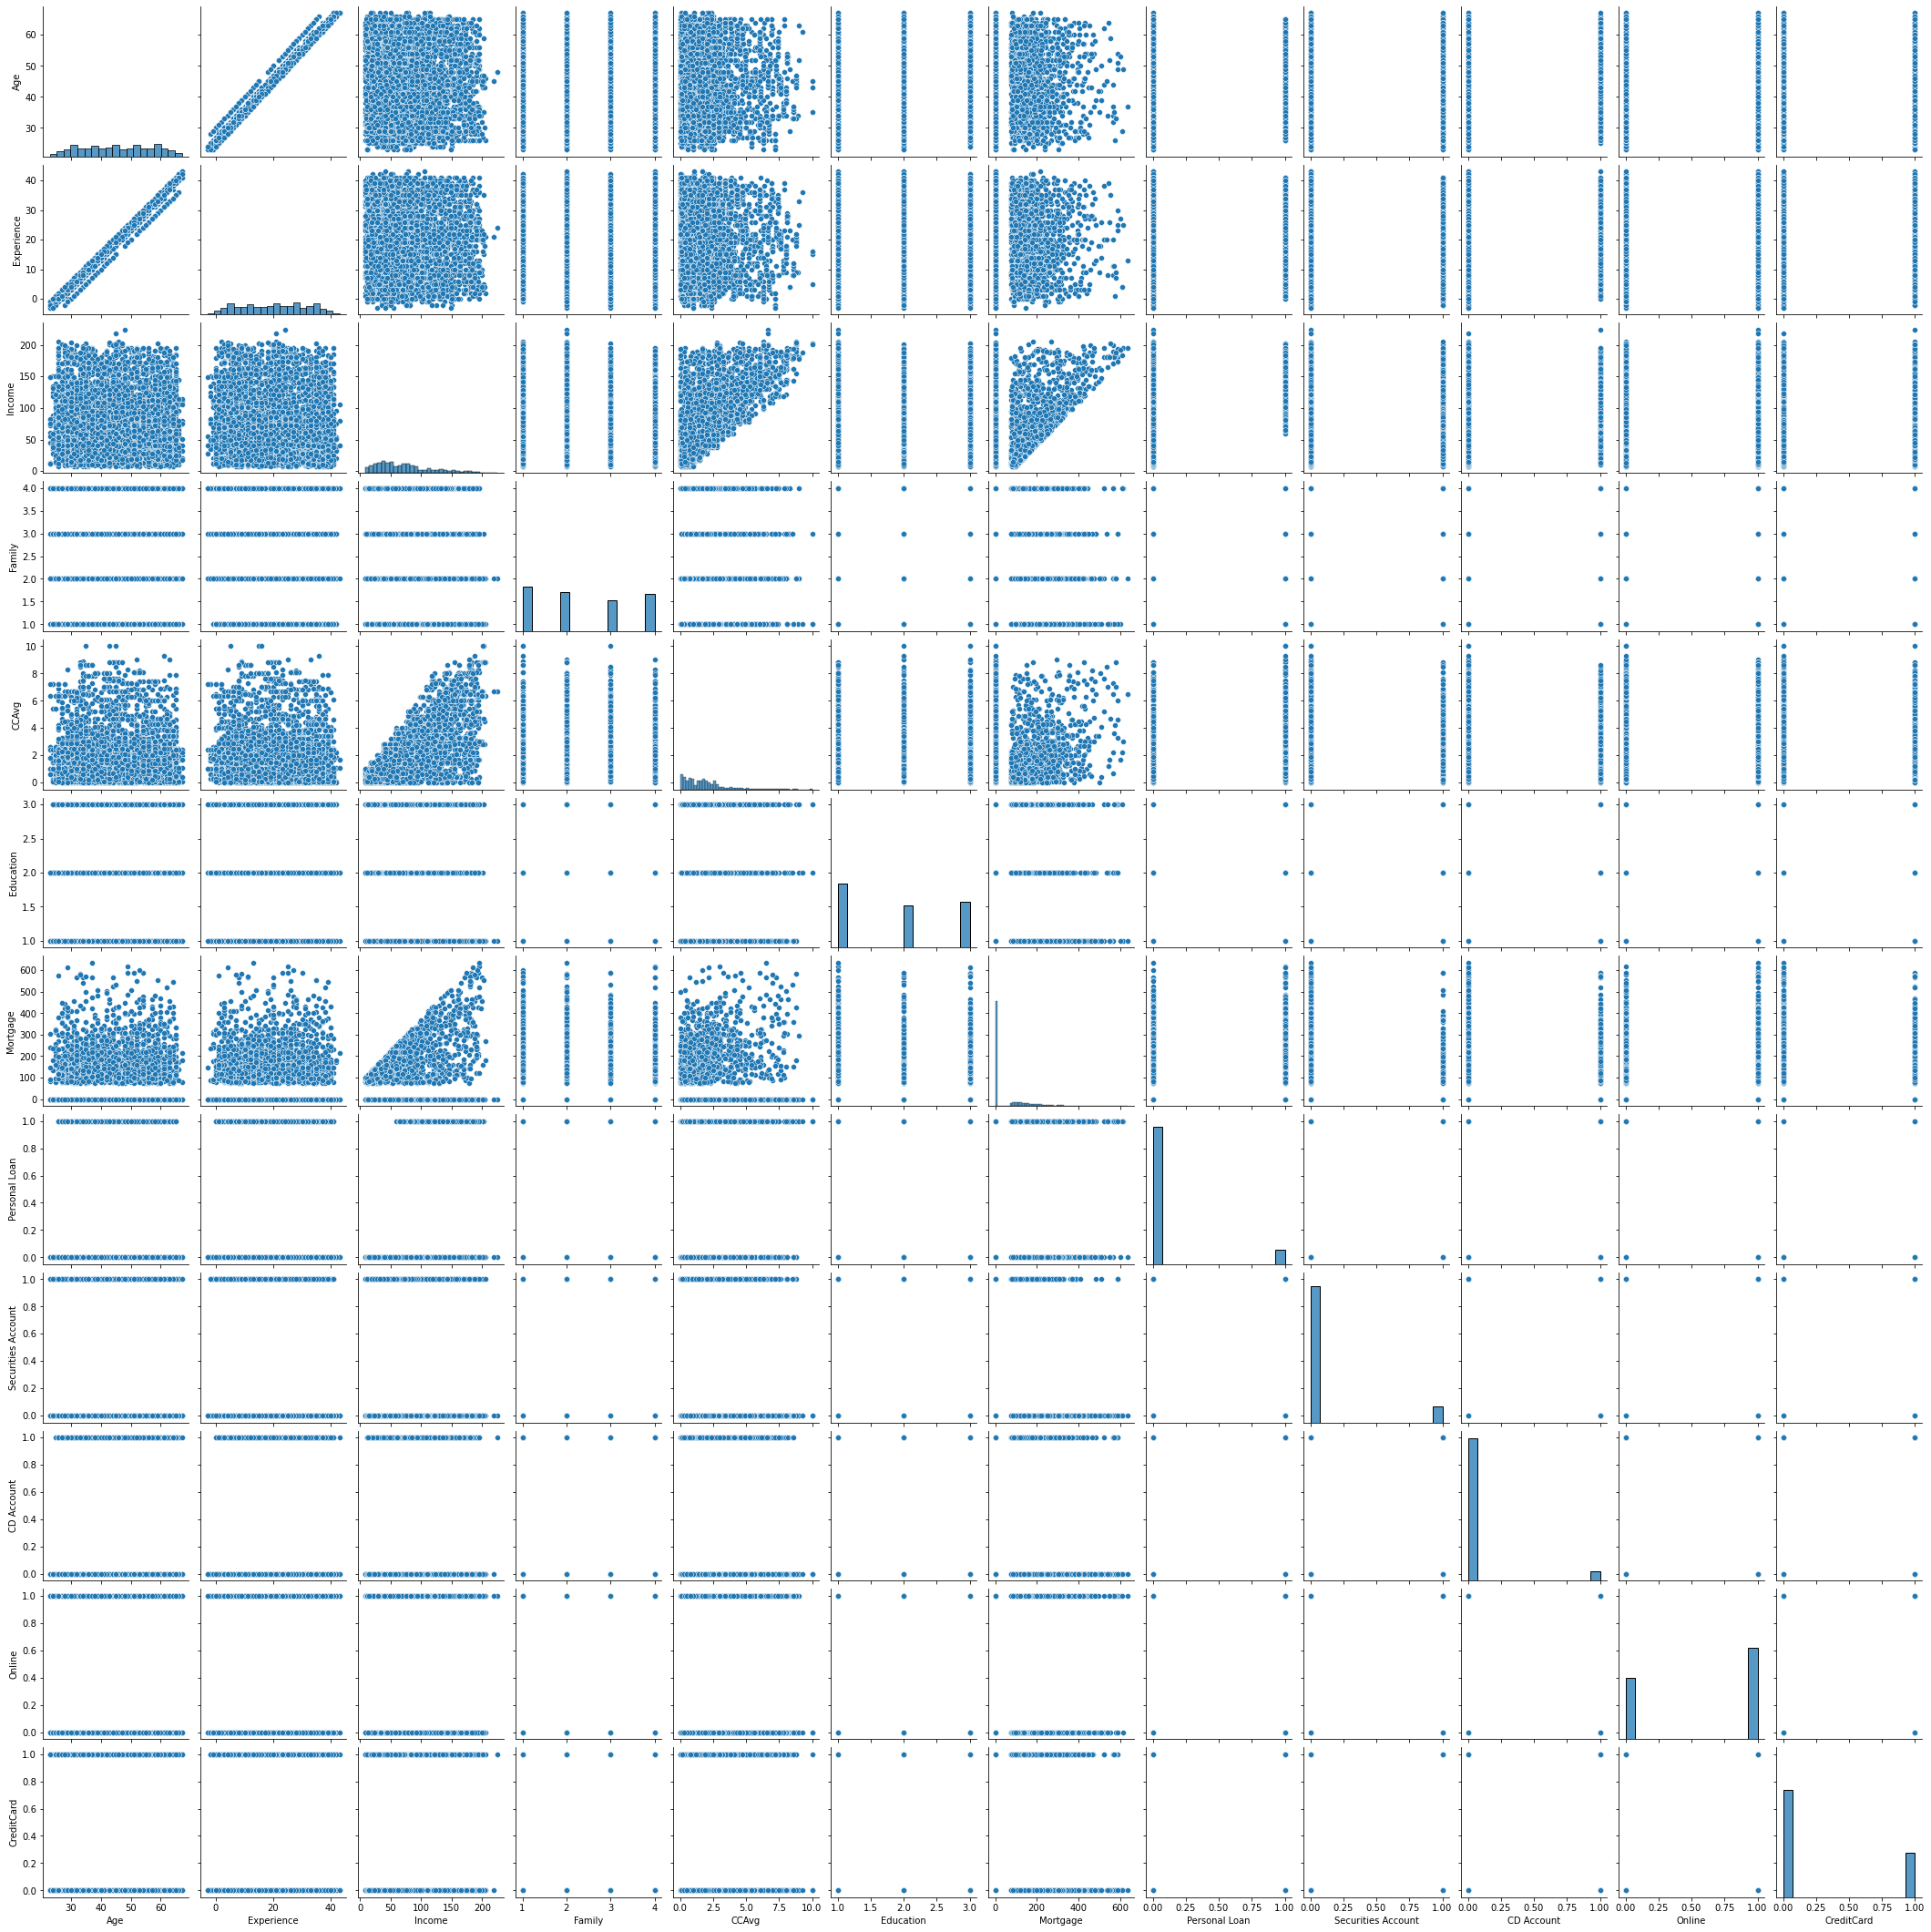

In [9]:
sns.pairplot(data)

Comment: Age and Experience are positively skew.

In [10]:
#checking negative values
data[data['Experience']<0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [11]:
data[data['Experience']<0]['Experience'].count()

52

Comment: There are total 52 negative values in data set.

In [12]:
#To overcome negative values.
data=data.assign(Experience=lambda x: x.Experience.where(x.Experience.ge(0)))
print(data.Experience.isna().sum())

52


In [13]:
#computing mean
Mean=data.Experience.mean()
print('Mean=',Mean)

Mean= 20.33104284559418


In [14]:
#computing median
Median=data.Experience.median()
print('Median=',Median)

Median= 20.0


In [15]:
data.Experience=data.Experience.fillna(Median)

In [16]:
Mean=data.Experience.mean()
print('Mean after imputation=',Mean)

Mean after imputation= 20.3276


In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.327600,11.253035,0.0,11.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


Comment: Now the minimum value of experience is 0 which was -3.

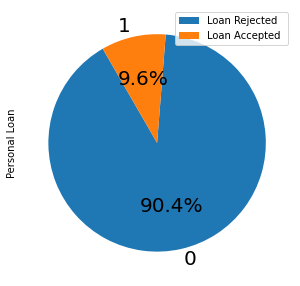

In [18]:
fig,ax = plt.subplots( figsize=(7,5) )
data['Personal Loan'].value_counts(sort=False).plot(kind='pie',autopct='%1.1f%%', fontsize= 20,startangle=120)
plt.legend(['Loan Rejected','Loan Accepted '])
plt.show()

Comment: The dataset is biased

The percentage of customers who has accepted the loan is very less

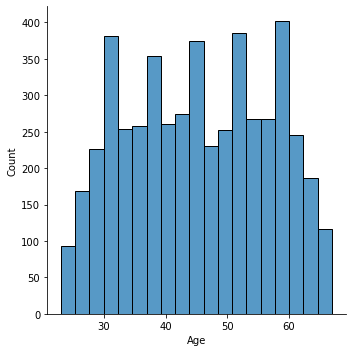

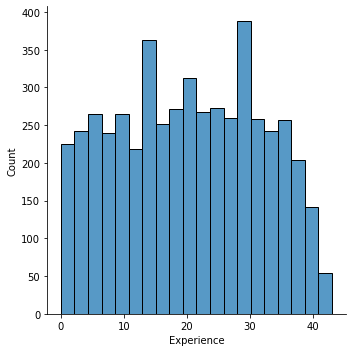

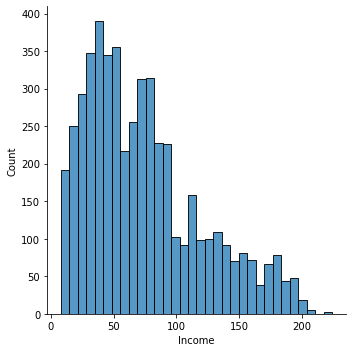

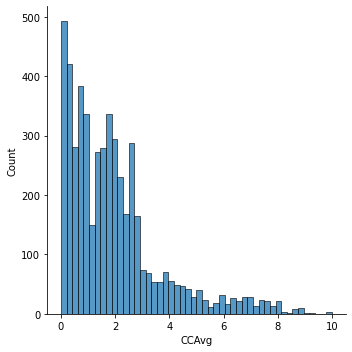

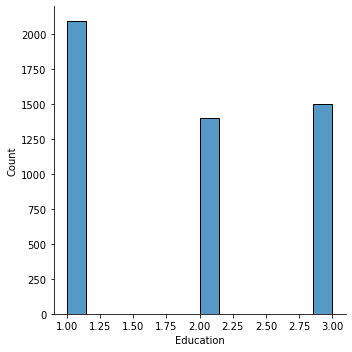

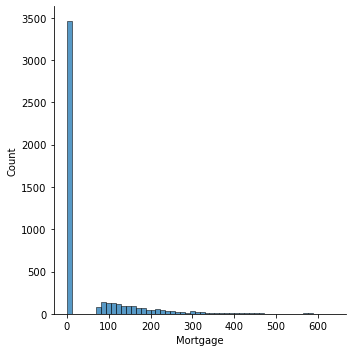

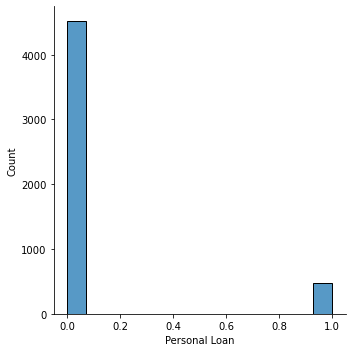

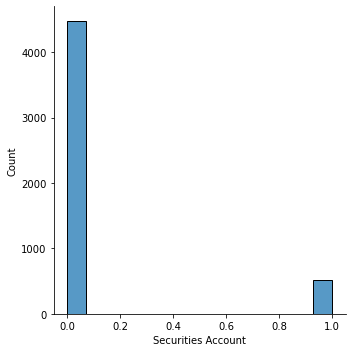

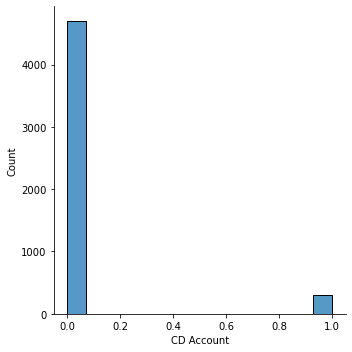

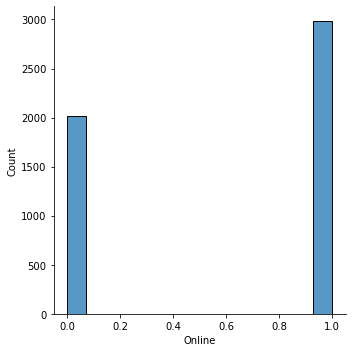

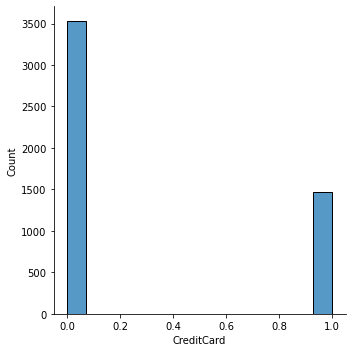

In [19]:
sns.displot(data['Age'])
sns.displot(data['Experience'])
sns.displot(data['Income'])
sns.displot(data['CCAvg'])
sns.displot(data['Education'])
sns.displot(data['Mortgage'])
sns.displot(data['Personal Loan'])
sns.displot(data['Securities Account'])
sns.displot(data['CD Account'])
sns.displot(data['Online'])
sns.displot(data['CreditCard'])

Comment: 1) The graph of age is normally distributed.

         2) The graph of Experience is normally distributed.
         
         3) The graph of Income is positively skewed.
         
         4) The graph of CCAvg is positively skewed.
         

C:\Users\Sharvin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


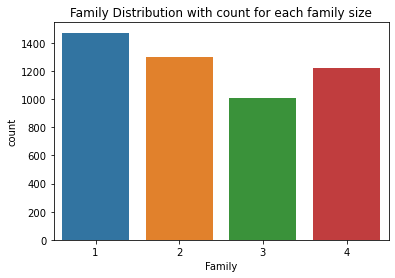

In [20]:
sns.countplot(data['Family'])
plt.title('Family Distribution with count for each family size');

COmment: Most number of customers have family size of one.

Number of customers with family size of 2 or 4 are almost same.

Customers with family size of 3 are comparatively less

In [21]:
data.groupby(['Personal Loan']).count()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480


In [22]:
#Spliting the data into independent variables and target variable
X=data.drop('Personal Loan',axis=1)
Y=data['Personal Loan']

In [23]:
X

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1.0,49,4,1.6,1,0,1,0,0,0
1,45,19.0,34,3,1.5,1,0,1,0,0,0
2,39,15.0,11,1,1.0,1,0,0,0,0,0
3,35,9.0,100,1,2.7,2,0,0,0,0,0
4,35,8.0,45,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3.0,40,1,1.9,3,0,0,0,1,0
4996,30,4.0,15,4,0.4,1,85,0,0,1,0
4997,63,39.0,24,2,0.3,3,0,0,0,0,0
4998,65,40.0,49,3,0.5,2,0,0,0,1,0


Comment: Except Personal loan column all other columns are in X variable.

In [24]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64

Comment: Here Personal Loan column is target variable i.e Y.

In [42]:
#Spliting into train and test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [46]:
X_train.head()
sc = StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled= sc.transform(X_test)

In [47]:
#Logistic regression
#fit the model
model=LogisticRegression(solver="liblinear")
model.fit(X_train_scaled,Y_train)

LogisticRegression(solver='liblinear')

In [48]:
#prediction on test
y_predict=model.predict(X_test_scaled)
model_score=model.score(X_test,Y_test)
lr_f1 = f1_score(Y_test,y_predict)
print("Model score:",model_score)
print("F1 score:",lr_f1) 

Model score: 0.08533333333333333
F1 score: 0.6933333333333334


Comment: The model score is higher (94.2%) which is a good fit.


<AxesSubplot:>

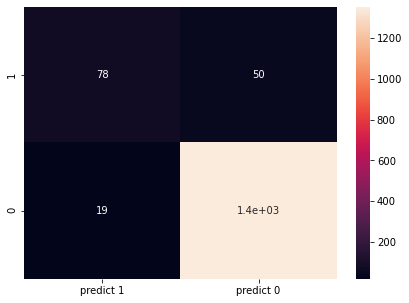

In [49]:
#Confusion Matrix
cm=metrics.confusion_matrix(Y_test,y_predict,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in ["1","0"]],columns=[i for i in ["predict 1","predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True)

Comment: True Positive=78 i.e The likelihood of a customer buying loan is 78, 

         False Positive=50
         
         False Negative=19

In [56]:
#Naive Bayes 
loan=GaussianNB()
loan.fit(X_train_scaled,Y_train.ravel())

GaussianNB()

In [57]:
loan_predict_train=loan.predict(X_train_scaled)
print("Model accuracy of train:{0:.4f}".format(metrics.accuracy_score(Y_train,loan_predict_train)))

Model accuracy of train:0.8829


Comment: The accuracy of train set is 88.29%.

In [58]:
loan_predict_test=loan.predict(X_test_scaled)
print("Model accuracy of test:{0:.4f}".format(metrics.accuracy_score(Y_test,loan_predict_test)))
accu = loan.score(X_test,Y_test)
print("Model score: ",accu)

Model accuracy of test:0.8867
Model score:  0.6753333333333333


In [59]:
nb_f1 = f1_score(Y_test,loan_predict_test)
print("F1 Score :",nb_f1)

F1 Score : 0.46875


Comment: The accuracy of test set is 67.53%

In [60]:
print("Confusion matrix")
cm=metrics.confusion_matrix(Y_test,loan_predict_test,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in ["1","0"]],columns=[i for i in ["predict 1","predict 0"]])

Confusion matrix


<AxesSubplot:>

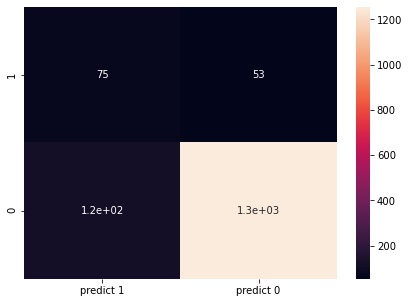

In [61]:
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True)

True positive=75,

False positive=53

In [62]:
#KNN Model
NNH=KNeighborsClassifier(n_neighbors=5,weights='distance')
NNH.fit(X_train_scaled,Y_train)

KNeighborsClassifier(weights='distance')

In [68]:
knn_predict=NNH.predict(X_test_scaled)
knn_accu = NNH.score(X_test_scaled,Y_test)
knn_accu

0.97

Comment: The score is 97% which is a best fit. 

In [69]:
knn_f1 = f1_score(Y_test,knn_predict)
print("F1 Score :",knn_f1)

F1 Score : 0.7963800904977376


In [65]:
print("confusion matrix")
cm=metrics.confusion_matrix(Y_test,knn_predict,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in ["1","0"]],columns=[i for i in ["predict 1","predict 0"]])

confusion matrix


<AxesSubplot:>

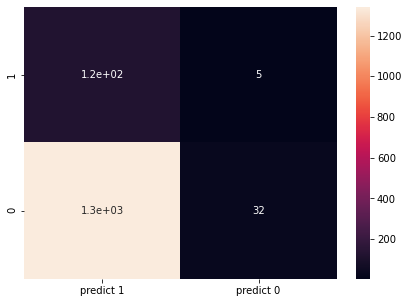

In [66]:
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True)

False Positive=5

True Negative=42

In [72]:
df_compare = pd.DataFrame([[model_score,lr_f1],[accu,nb_f1],[knn_accu,knn_f1]],columns=['Accuracy','F1 Score'],index=['Logistic Regression','Gaussian Naive Bayes','KNearest Neighbour'])
df_compare

,Accuracy,F1 Score
Logistic Regression,0.085333,0.693333
Gaussian Naive Bayes,0.675333,0.468750
KNearest Neighbour,0.970000,0.796380


# Conclusion: 


There are many attributes in the dataset which are corelated with each other for example Experience & Age , Income & CCAvg. Naive Bayes Algorithm assumes that the features are independent which is not true in this dataset, hence its performance is not good.

Among above three algorithms Logistice Regression or KNN would be the best choice to predict if customer will accept loan or not.